# The influence of demographic, social, and school related variables on student’s Portuguese language grades - Final Report

## Data Exploration and Cleaning

### Import needed modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_student = pd.read_csv('student-por.csv',sep=';',header=1,skipinitialspace=True)

### Data Exploration

In [3]:
df_student.head()

,GP,F,18,U,GT3,A,4,4.1,at_home,teacher,...,4.2,3,4.3,1,1.1,3.1,4.4,0.1,11,11.1
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
1,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
2,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
3,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
4,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13


In [4]:
# Q1: How many columns are there?

# A1: There are 33 columns.

In [5]:
# Q1: What types are the columms?

# A1: see below

In [6]:
df_student.dtypes

GP         object
F          object
18          int64
U          object
GT3        object
A          object
4           int64
4.1         int64
at_home    object
teacher    object
course     object
mother     object
2           int64
2.1         int64
0           int64
yes        object
no         object
no.1       object
no.2       object
yes.1      object
yes.2      object
no.3       object
no.4       object
4.2         int64
3           int64
4.3         int64
1           int64
1.1         int64
3.1         int64
4.4         int64
0.1         int64
11          int64
11.1        int64
dtype: object

In [7]:
# Q1: Are there any missing values?

# A1: No

In [8]:
df_student.isnull().values.any()

False

In [9]:
df_student.describe()

,18,4,4.1,2,2.1,0,4.2,3,4.3,1,1.1,3.1,4.4,0.1,11,11.1
count,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000,648.000000
mean,16.742284,2.512346,2.304012,1.567901,1.930556,0.222222,3.930556,3.180556,3.183642,1.503086,2.282407,3.537037,3.658951,11.416667,11.570988,11.907407
std,1.218077,1.133923,1.098763,0.749046,0.830146,0.593629,0.956451,1.051881,1.176237,0.925338,1.284385,1.447223,4.644324,2.710532,2.915803,3.232955
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,4.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [10]:
df_student.dtypes

GP         object
F          object
18          int64
U          object
GT3        object
A          object
4           int64
4.1         int64
at_home    object
teacher    object
course     object
mother     object
2           int64
2.1         int64
0           int64
yes        object
no         object
no.1       object
no.2       object
yes.1      object
yes.2      object
no.3       object
no.4       object
4.2         int64
3           int64
4.3         int64
1           int64
1.1         int64
3.1         int64
4.4         int64
0.1         int64
11          int64
11.1        int64
dtype: object

Q1: Are there an equal number of M and F?

A1: There are 382 M and 266 F.

In [11]:
df_student.groupby('F').count()

,GP,18,U,GT3,A,4,4.1,at_home,teacher,course,...,4.2,3,4.3,1,1.1,3.1,4.4,0.1,11,11.1
F,,,,,,,,,,,,,,,,,,,,,
F,382,382,382,382,382,382,382,382,382,382,...,382,382,382,382,382,382,382,382,382,382
M,266,266,266,266,266,266,266,266,266,266,...,266,266,266,266,266,266,266,266,266,266


### Add the columns of the features for readibility

In [12]:
# Add column names for readability
names = ['school','sex','age','address','famsize','Pstatus','Medu','Fedu','Mjob','Fjob','reason',\
           'guardian','traveltime','studytime','failures','schoolsup','famsup','paid','activities',\
            'nursery','higher','internet','romantic','famrel','freetime','goout','Dalc','Walc',\
            'health','absences','G1','G2','G3']

In [13]:
df_student.columns = names

In [14]:
df_student.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
1,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
2,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
3,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
4,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,6,12,12,13
5,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,13,12,13
6,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
7,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,15,16,17
8,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,12,12,13
9,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,2,14,14,14


In [15]:
df_student.shape

(648, 33)

### Separate the data into values by sex

In [16]:
df_student_f = df_student[(df_student['sex']) == 'F']
print(df_student_f)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   17       U     GT3       T     1     1   at_home     other   
1       GP   F   15       U     LE3       T     1     1   at_home     other   
2       GP   F   15       U     GT3       T     4     2    health  services   
3       GP   F   16       U     GT3       T     3     3     other     other   
6       GP   F   17       U     GT3       A     4     4     other   teacher   
9       GP   F   15       U     GT3       T     4     4   teacher    health   
10      GP   F   15       U     GT3       T     2     1  services     other   
14      GP   F   16       U     GT3       T     4     4    health     other   
15      GP   F   16       U     GT3       T     4     4  services  services   
16      GP   F   16       U     GT3       T     3     3     other     other   
23      GP   F   15       R     GT3       T     2     4  services    health   
24      GP   F   16       U     GT3       T     2   

In [17]:
### Grade distributio: male and female students

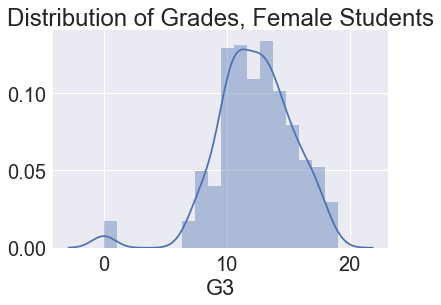

In [18]:
import seaborn as sns
sns.set(font_scale=2)
sns.distplot(df_student_f['G3'])
plt.title('Distribution of Grades, Female Students')
plt.show()


In [19]:
df_student_m = df_student[(df_student['sex']) == 'M']
print (df_student_m)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
4       GP   M   16       U     LE3       T     4     3  services     other   
5       GP   M   16       U     LE3       T     2     2     other     other   
7       GP   M   15       U     LE3       A     3     2  services     other   
8       GP   M   15       U     GT3       T     3     4     other     other   
11      GP   M   15       U     LE3       T     4     4    health  services   
12      GP   M   15       U     GT3       T     4     3   teacher     other   
13      GP   M   15       U     GT3       A     2     2     other     other   
17      GP   M   17       U     GT3       T     3     2  services  services   
18      GP   M   16       U     LE3       T     4     3    health     other   
19      GP   M   15       U     GT3       T     4     3   teacher     other   
20      GP   M   15       U     GT3       T     4     4    health    health   
21      GP   M   16       U     LE3       T     4   

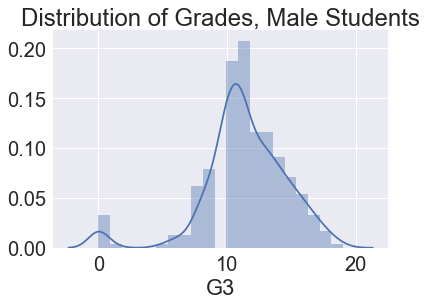

In [20]:
import seaborn as sns
sns.set(font_scale=2)
sns.distplot(df_student_m['G3'])
plt.title('Distribution of Grades, Male Students')
plt.show()


In [21]:
df_student_f.mean()

age           16.785340
Medu           2.397906
Fedu           2.225131
traveltime     1.541885
studytime      2.073298
failures       0.185864
famrel         3.863874
freetime       3.052356
goout          3.125654
Dalc           1.285340
Walc           1.939791
health         3.369110
absences       3.575916
G1            11.667539
G2            11.824607
G3            12.256545
dtype: float64

In [22]:
df_student_m.mean()

age           16.680451
Medu           2.676692
Fedu           2.417293
traveltime     1.605263
studytime      1.725564
failures       0.274436
famrel         4.026316
freetime       3.364662
goout          3.266917
Dalc           1.815789
Walc           2.774436
health         3.778195
absences       3.778195
G1            11.056391
G2            11.206767
G3            11.406015
dtype: float64

### Perform t_test statistic to compare male and female grades


In [23]:
import numpy as np
from scipy.stats import ttest_ind, ttest_ind_from_stats
t, p = ttest_ind(df_student_m['G3'], df_student_f['G3'])

In [24]:
print (t, p)

-3.31980181849 0.000951478289996


In [25]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Box Plot Comparisons

In [26]:
# Is there a correlation between the amount a student studies (st) and their final grade (g)?

df_student_f_st = df_student_f['studytime']
df_student_f_g = df_student_f['G3']

df_student_m_st = df_student_m['studytime']
df_student_m_g = df_student_m['G3']

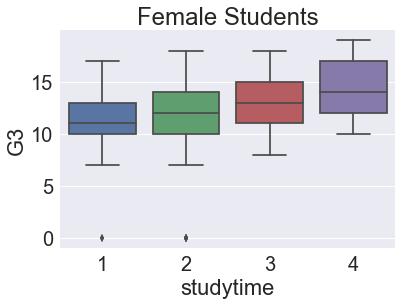

In [27]:
import seaborn as sns
sns.boxplot(df_student_f_st,df_student_f_g)
plt.title('Female Students')
plt.show()

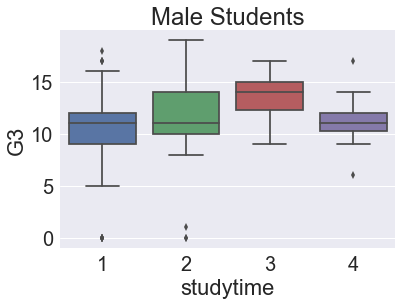

In [28]:
sns.boxplot(df_student_m_st,df_student_m_g)
plt.title('Male Students')
plt.show()

In [29]:
from scipy.stats import linregress
linregress(df_student_f_st, df_student_f_g)

LinregressResult(slope=0.97913828337874687, intercept=10.22649863760218, rvalue=0.25153238263502709, pvalue=6.3472194843240125e-07, stderr=0.19327063859378724)

In [30]:
linregress(df_student_m_st, df_student_m_g)

LinregressResult(slope=0.81031223383259965, intercept=10.007769491243748, rvalue=0.20165073399775979, pvalue=0.00094174461192573188, stderr=0.24223462340641427)

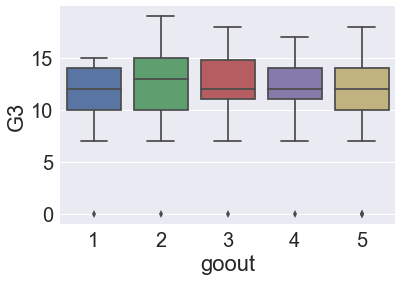

<function matplotlib.pyplot.show>

In [31]:
# Is there a correlation between the amount of time that the students go out (goout) and their
# grades (g)?

df_student_f_go = df_student_f['goout']

df_student_m_go = df_student_m['goout']

sns.boxplot(df_student_f_go, df_student_f_g)
plt.show()

sns.boxplot(df_student_m_go, df_student_m_g)
plt.show

In [32]:
list(df_student)

['school',
 'sex',
 'age',
 'address',
 'famsize',
 'Pstatus',
 'Medu',
 'Fedu',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'traveltime',
 'studytime',
 'failures',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

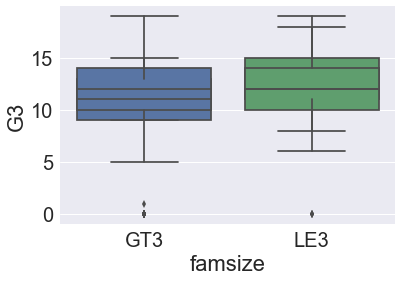

In [33]:
# Is there a correlation between the student's family size and their grades?

df_student_famsize = df_student['famsize']
df_student_g = df_student['G3']

sns.boxplot(df_student_famsize, df_student_g)
plt.show()

 Concluson: Family size has no correlation with final student grades

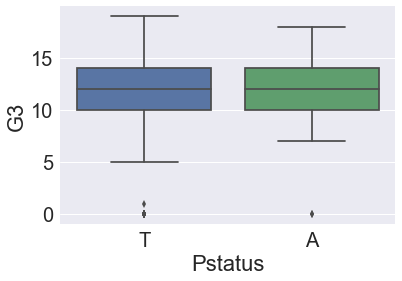

In [34]:
# Is there a correlation between the student's parent's cohabitation and grades?

df_student_Ps = df_student['Pstatus']
df_student_g = df_student['G3']

sns.boxplot(df_student_Ps, df_student_g)
plt.show()

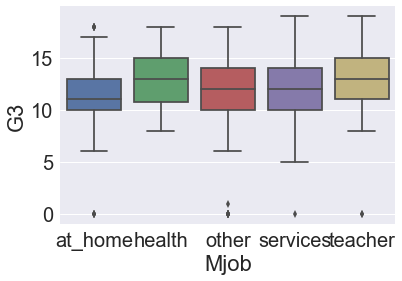

In [35]:
# Is there a correlation between the student's mother's job and grades?

df_student_mjob = df_student['Mjob']
df_student_g = df_student['G3']

sns.boxplot(df_student_mjob, df_student_g)
plt.show()

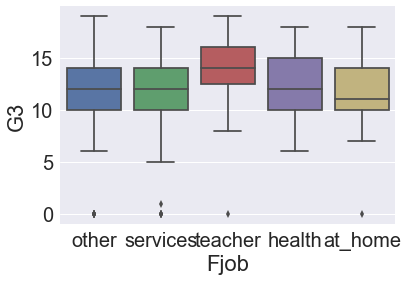

In [36]:
# Is there a correlation between the student's father's job and grades?

df_student_fjob = df_student['Fjob']
df_student_g = df_student['G3']

sns.boxplot(df_student_fjob, df_student_g)
plt.show()

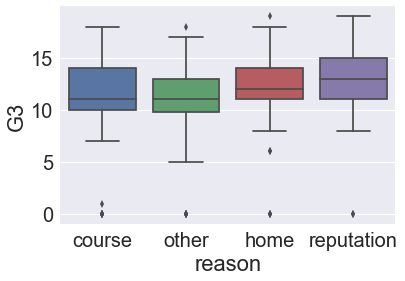

In [37]:
# Is there a correlation between the student's reason for choosing their school and grades?

df_student_reason = df_student['reason']
df_student_g = df_student['G3']

sns.boxplot(df_student_reason, df_student_g)
plt.show()

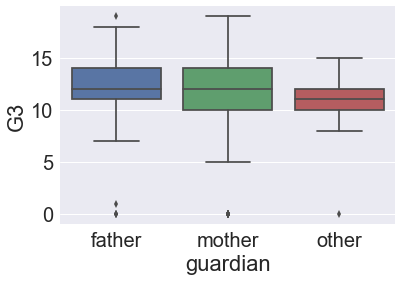

In [38]:
# Is there a correlation between the student's guardian and grades?

df_student_guard = df_student['guardian']
df_student_g = df_student['G3']

sns.boxplot(df_student_guard, df_student_g)
plt.show()

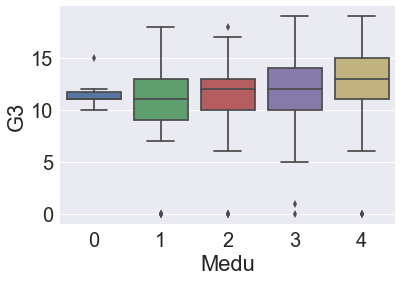

In [39]:
# Is there a correlation between the education of the student's mother and their grades?

df_student_medu = df_student['Medu']
df_student_g = df_student['G3']

sns.boxplot(df_student_medu, df_student_g)
plt.show()

In [40]:
# Is there a correlation between the father's education level and the students grades?

df_student_fedu = df_student['Fedu']
df_student_g = df_student['G3']

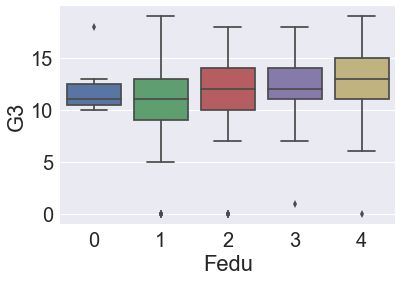

In [41]:
sns.boxplot(df_student_fedu, df_student_g)
plt.show() 

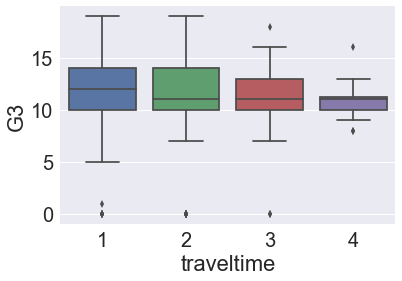

In [42]:
# Is there a correlation between the travel time from home to school and their grades?

df_student_tt = df_student['traveltime']
df_student_g = df_student['G3']

sns.boxplot(df_student_tt, df_student_g)
plt.show()

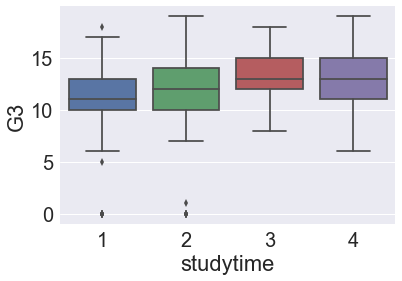

In [43]:
# Is there a correlation between the student's study time and grades?

df_student_stime = df_student['studytime']
df_student_g = df_student['G3']

sns.boxplot(df_student_stime, df_student_g)
plt.show()

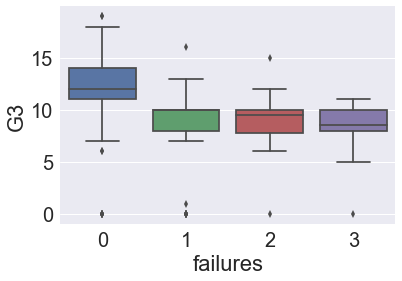

In [44]:
# Is there a correlation between the student's previous failures and their grades?

df_student_fail = df_student['failures']
df_student_g = df_student['G3']

sns.boxplot(df_student_fail, df_student_g)
plt.show()

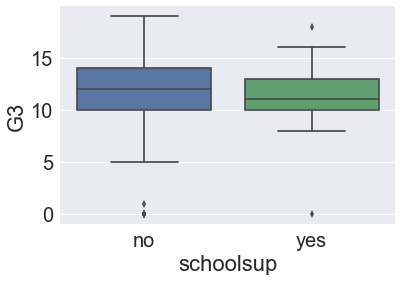

In [45]:
# Is there a correlation between the student's support from the school and their grades?

df_student_sups = df_student['schoolsup']
df_student_g = df_student['G3']

sns.boxplot(df_student_sups, df_student_g)
plt.show()

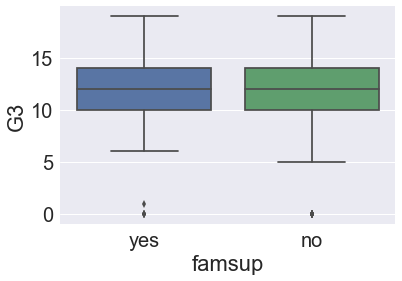

In [46]:
# Is there a correlation between the student's family education support and their grades?

df_student_fes = df_student['famsup']
df_student_g = df_student['G3']

sns.boxplot(df_student_fes, df_student_g)
plt.show()

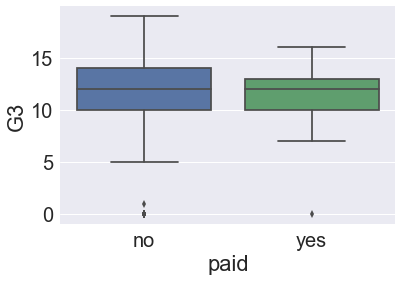

In [47]:
# Is there a correlation between the student's payment for extra classes and their grades?

df_student_exc = df_student['paid']
df_student_g = df_student['G3']

sns.boxplot(df_student_exc, df_student_g)
plt.show()

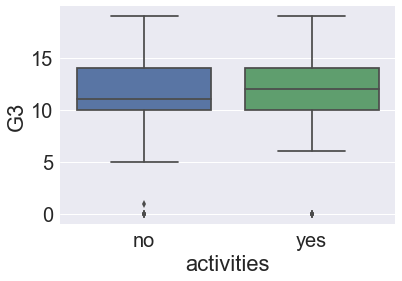

In [48]:
# Is there a correlation between the student's attendance in extra curricular activities 
#  and their grades?

df_student_xca = df_student['activities']
df_student_g = df_student['G3']

sns.boxplot(df_student_xca, df_student_g)
plt.show()

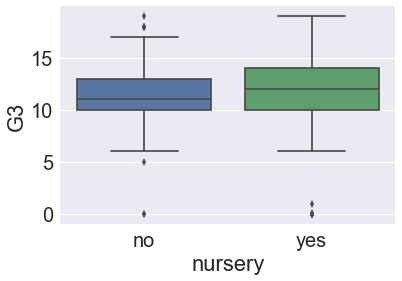

In [49]:
# Is there a correlation between the whether the student attended nursery school and grades?

df_student_nurs = df_student['nursery']
df_student_g = df_student['G3']

sns.boxplot(df_student_nurs, df_student_g)
plt.show()

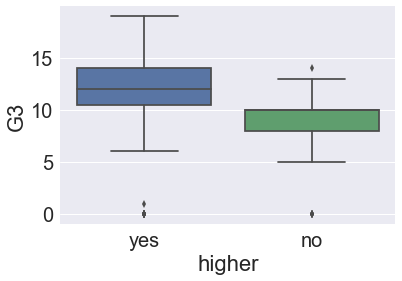

In [50]:
# Is there a correlation between the student's who want to pursue higher education and their grades?

df_student_high = df_student['higher']
df_student_g = df_student['G3']

sns.boxplot(df_student_high, df_student_g)
plt.show()

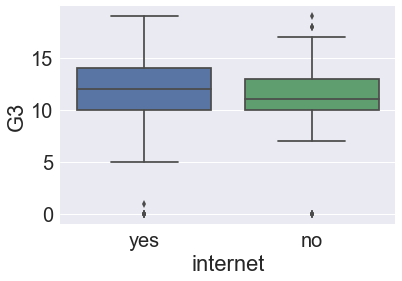

In [51]:
# Is there a correlation between the student's access to the internet at home and their grades?

df_student_net = df_student['internet']
df_student_g = df_student['G3']

sns.boxplot(df_student_net, df_student_g)
plt.show()

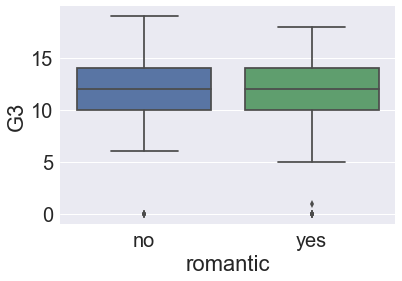

In [52]:
# Is there a correlation between whether the student is in a romantic relationship and grades?

df_student_rom = df_student['romantic']
df_student_g = df_student['G3']

sns.boxplot(df_student_rom, df_student_g)
plt.show()

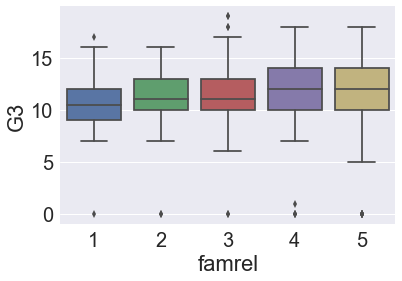

In [53]:
# Is there a correlation between the student's quality of family relationships and their grades?

df_student_famrel = df_student['famrel']
df_student_g = df_student['G3']

sns.boxplot(df_student_famrel, df_student_g)
plt.show()

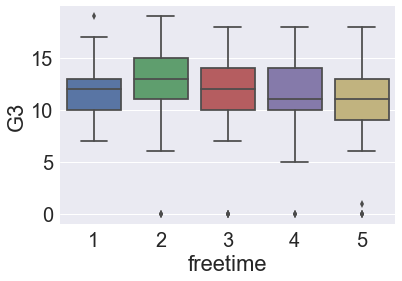

In [54]:
# Is there a correlation between the student's free time and their grades?

df_student_ft = df_student['freetime']
df_student_g = df_student['G3']

sns.boxplot(df_student_ft, df_student_g)
plt.show()

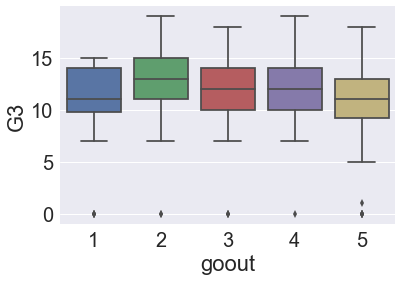

In [55]:
# Is there a correlation between whether the student goes out with friends and grades?

df_student_goout = df_student['goout']
df_student_g = df_student['G3']

sns.boxplot(df_student_goout, df_student_g)
plt.show()

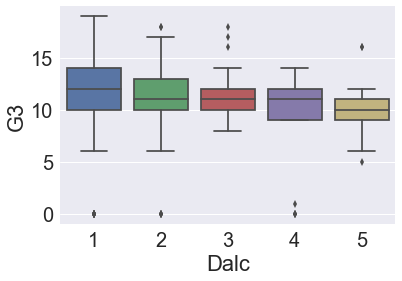

In [56]:
# Is there a correlation between the student's daily comsumption of alcohol and their grades?

df_student_dalc = df_student['Dalc']
df_student_g = df_student['G3']

sns.boxplot(df_student_dalc, df_student_g)
plt.show()

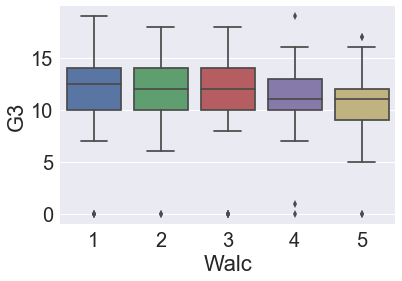

In [57]:
# Is there a correlation between the student's weekend comsumption of alcohol and their grades?

df_student_walc = df_student['Walc']
df_student_g = df_student['G3']

sns.boxplot(df_student_walc, df_student_g)
plt.show()

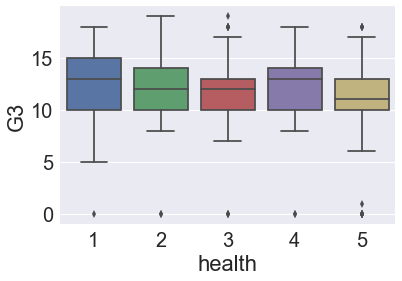

In [58]:
# Is there a correlation between the student's health and their grades?

df_student_h = df_student['health']
df_student_g = df_student['G3']

sns.boxplot(df_student_h, df_student_g)
plt.show()

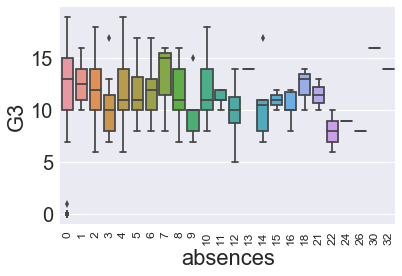

In [59]:
# Is there a correlation between the student's absences and their grades?

df_student_ab = df_student['absences']
df_student_g = df_student['G3']

sns.boxplot(df_student_ab, df_student_g)
plt.xticks(rotation=90, fontsize = 12)
plt.show()

### Calculate the Pearson r for the correlation between student study time and their grades.

In [60]:
from scipy import stats

stats.pearsonr(df_student_stime, df_student_g)

(0.24984145557043991, 1.1169355852203507e-10)

In [61]:
stats.pearsonr(df_student_fail, df_student_g)

(-0.39354412818102408, 1.9643396783858602e-25)

In [62]:
stats.pearsonr(df_student_dalc, df_student_g)

(-0.20501401923042509, 1.4038004566917858e-07)

In [63]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [64]:
from scipy.stats import linregress
linregress(df_student_fail, df_student_g)

LinregressResult(slope=-2.1432748538011741, intercept=12.383690708252113, rvalue=-0.39354412818102436, pvalue=1.96433967838559e-25, stderr=0.19698272368355124)

In [65]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

## Data Preprocessing


In [66]:
### Use sklearn OneHotEncoder

In [67]:
from numpy import array
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: reason.

data_reason = df_student['reason']
print (data_reason)
encoded = to_categorical(data_reason)
inverted = argmax (encoded[0])
print(inverted)

In [68]:
data_reason = df_student['reason']
values_reason = array (data_reason)
print (values_reason)

#integer encode
label_encoder = LabelEncoder()
integer_encoded_reason = label_encoder.fit_transform(values_reason)
print (integer_encoded_reason)

#binary encode
#onehot_encoded = OneHotEncoder(sparse = False)
#integer_encoded_reason = integer_encoded_reason.reshape(len(integer_encoded_reason),1)
#onehot_encoded_reason = onehot_encoded.fit_transform(integer_encoded_reason)
#print(onehot_encoded_reason)
#df_student['reason'] = onehot_encoded_reason

['course' 'other' 'home' 'home' 'reputation' 'home' 'home' 'home' 'home'
 'reputation' 'reputation' 'course' 'course' 'home' 'home' 'reputation'
 'reputation' 'course' 'home' 'reputation' 'other' 'course' 'reputation'
 'course' 'home' 'home' 'other' 'home' 'home' 'home' 'reputation' 'course'
 'course' 'home' 'other' 'home' 'reputation' 'course' 'reputation' 'home'
 'home' 'course' 'course' 'course' 'course' 'home' 'reputation' 'home'
 'other' 'course' 'other' 'other' 'course' 'other' 'other' 'reputation'
 'reputation' 'home' 'course' 'other' 'course' 'reputation' 'home'
 'reputation' 'course' 'reputation' 'course' 'reputation' 'reputation'
 'reputation' 'course' 'reputation' 'reputation' 'home' 'home' 'course'
 'reputation' 'home' 'course' 'course' 'home' 'reputation' 'home' 'home'
 'reputation' 'course' 'reputation' 'reputation' 'reputation' 'home'
 'reputation' 'home' 'home' 'reputation' 'home' 'reputation' 'course'
 'reputation' 'course' 'other' 'other' 'course' 'home' 'course'
 're

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: Mjob.

In [69]:
data_Mjob = df_student['Mjob']
values_Mjob = array(data_Mjob)

print (values_Mjob)

['at_home' 'at_home' 'health' 'other' 'services' 'other' 'other' 'services'
 'other' 'teacher' 'services' 'health' 'teacher' 'other' 'health'
 'services' 'other' 'services' 'health' 'teacher' 'health' 'teacher'
 'other' 'services' 'services' 'other' 'health' 'services' 'teacher'
 'health' 'services' 'teacher' 'other' 'other' 'other' 'teacher' 'other'
 'services' 'at_home' 'other' 'teacher' 'services' 'services' 'other'
 'other' 'other' 'health' 'teacher' 'services' 'services' 'health' 'health'
 'services' 'other' 'other' 'services' 'teacher' 'other' 'services'
 'health' 'services' 'other' 'teacher' 'services' 'teacher' 'other'
 'services' 'health' 'other' 'other' 'other' 'other' 'other' 'other'
 'teacher' 'teacher' 'other' 'other' 'at_home' 'other' 'other' 'services'
 'services' 'other' 'services' 'at_home' 'other' 'services' 'teacher'
 'other' 'services' 'other' 'teacher' 'services' 'at_home' 'services'
 'other' 'other' 'other' 'services' 'services' 'services' 'services'
 'services' '

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: Mjob.

In [70]:
#integer encode

label_encoded_Mjob = LabelEncoder()
integer_encoded_Mjob = label_encoded_Mjob.fit_transform(values_Mjob)
print (integer_encoded_Mjob)

[0 0 1 2 3 2 2 3 2 4 3 1 4 2 1 3 2 3 1 4 1 4 2 3 3 2 1 3 4 1 3 4 2 2 2 4 2
 3 0 2 4 3 3 2 2 2 1 4 3 3 1 1 3 2 2 3 4 2 3 1 3 2 4 3 4 2 3 1 2 2 2 2 2 2
 4 4 2 2 0 2 2 3 3 2 3 0 2 3 4 2 3 2 4 3 0 3 2 2 2 3 3 3 3 3 2 2 3 2 1 4 3
 0 4 1 4 2 2 2 2 0 3 2 1 2 3 2 0 4 2 3 3 2 0 2 3 0 2 0 3 0 0 3 2 2 2 3 4 2
 4 3 3 3 4 0 2 2 0 1 0 0 4 3 2 0 3 3 2 0 2 0 0 2 1 0 2 2 0 2 3 2 1 2 1 2 2
 4 0 2 4 3 2 4 2 4 3 3 2 2 3 3 2 1 0 3 0 0 3 2 3 3 4 3 4 1 2 2 2 3 0 3 4 0
 4 2 3 2 3 3 2 2 3 0 0 0 0 3 2 4 2 2 3 0 2 1 2 4 1 2 0 2 2 2 3 0 2 2 4 2 0
 2 0 2 2 2 0 4 1 4 4 3 4 2 3 0 2 2 2 2 3 2 2 3 0 3 2 2 1 2 4 3 3 2 2 2 3 2
 2 3 2 3 4 2 2 0 2 2 3 4 1 2 2 2 2 0 2 0 3 2 4 1 2 3 4 0 3 4 0 2 2 2 2 0 3
 3 4 4 1 3 3 1 1 2 2 4 1 2 3 2 1 0 3 2 2 3 2 4 2 1 0 0 1 4 2 1 3 3 2 2 2 2
 2 2 3 3 0 2 2 2 3 4 4 0 2 0 0 0 2 3 2 0 3 2 3 2 4 3 0 0 2 4 4 1 3 3 0 2 2
 3 2 3 1 4 0 2 4 2 0 2 2 3 2 3 0 2 0 0 0 0 0 2 0 2 4 0 0 2 2 2 2 0 2 1 1 2
 2 0 2 4 2 2 2 2 2 2 0 0 0 2 0 0 0 0 2 0 2 2 2 1 2 3 0 2 0 0 2 2 3 0 2 0 0
 0 2 2 0 2 2 0 2 0 2 1 2 

In [71]:
#onehot_encoded = OneHotEncoder(sparse = False)
#integer_encoded_Mjob = integer_encoded_Mjob.reshape(len(integer_encoded_Mjob),1)
#onehot_encoded_Mjob = onehot_encoded.fit_transform(integer_encoded_Mjob)
#print(onehot_encoded_reason)
#df_student['Mjob'] = onehot_encoded_Mjob

In [73]:
#df_student['Mjob'] = onehot_encoded_Mjob

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: Fjob.

In [74]:
data_Fjob = df_student['Fjob']
values_Fjob = array(data_Fjob)

In [75]:
print (values_Fjob)

['other' 'other' 'services' 'other' 'other' 'other' 'teacher' 'other'
 'other' 'health' 'other' 'services' 'other' 'other' 'other' 'services'
 'other' 'services' 'other' 'other' 'health' 'other' 'other' 'health'
 'services' 'other' 'services' 'other' 'teacher' 'services' 'services'
 'at_home' 'other' 'other' 'other' 'services' 'teacher' 'health' 'other'
 'other' 'other' 'teacher' 'services' 'at_home' 'other' 'services'
 'services' 'other' 'teacher' 'services' 'other' 'health' 'services'
 'other' 'other' 'services' 'health' 'at_home' 'other' 'teacher' 'services'
 'services' 'health' 'services' 'services' 'services' 'other' 'services'
 'other' 'other' 'other' 'other' 'other' 'services' 'other' 'other' 'other'
 'other' 'other' 'services' 'other' 'other' 'services' 'other' 'services'
 'other' 'other' 'other' 'health' 'other' 'other' 'other' 'services'
 'health' 'other' 'other' 'other' 'other' 'at_home' 'services' 'teacher'
 'other' 'other' 'other' 'health' 'other' 'other' 'other' 'health'


In [76]:
# integer encode
label_encoder_Fjob = LabelEncoder()
integer_encoded_Fjob = label_encoder_Fjob.fit_transform(values_Fjob)
print (integer_encoded_Fjob)

[2 2 3 2 2 2 4 2 2 1 2 3 2 2 2 3 2 3 2 2 1 2 2 1 3 2 3 2 4 3 3 0 2 2 2 3 4
 1 2 2 2 4 3 0 2 3 3 2 4 3 2 1 3 2 2 3 1 0 2 4 3 3 1 3 3 3 2 3 2 2 2 2 2 3
 2 2 2 2 2 3 2 2 3 2 3 2 2 2 1 2 2 2 3 1 2 2 2 2 0 3 4 2 2 2 1 2 2 2 1 4 2
 2 2 3 4 4 3 2 2 3 3 1 2 2 3 2 2 4 2 4 2 2 2 2 2 2 2 4 0 2 2 3 3 3 2 2 4 2
 3 3 3 3 3 0 2 3 2 3 2 3 4 2 2 2 3 0 4 3 2 2 2 3 3 2 2 2 3 3 3 2 3 2 1 2 2
 2 3 2 2 2 2 3 2 2 2 3 2 2 3 3 2 2 2 3 3 3 3 2 3 4 2 4 4 2 2 2 2 3 3 2 2 2
 2 2 2 2 2 2 2 2 1 2 0 3 2 4 2 3 2 2 3 2 2 2 2 4 2 2 2 2 2 2 2 3 2 0 4 2 0
 2 3 2 3 2 2 2 2 2 2 3 3 2 2 2 2 2 3 2 3 3 2 2 2 3 2 2 2 2 3 3 2 2 0 2 0 2
 3 3 2 2 2 2 2 3 2 2 2 2 2 2 3 3 2 0 2 1 2 3 3 1 3 3 3 2 2 3 2 2 2 2 2 0 4
 3 4 2 3 2 2 2 2 2 2 4 2 4 3 2 1 3 2 3 4 2 2 4 2 3 3 2 2 2 2 1 3 2 2 2 2 2
 2 2 3 3 0 2 2 3 2 3 4 2 2 3 2 2 2 3 2 2 2 2 3 2 3 2 0 2 3 3 2 2 2 2 2 0 2
 3 2 3 2 2 2 2 2 2 2 3 2 2 2 2 2 2 3 2 3 2 2 2 2 2 2 2 3 3 2 2 3 3 2 3 3 1
 2 0 2 4 3 3 2 2 3 3 2 2 3 2 2 2 2 0 2 2 2 3 3 2 4 2 2 2 3 2 3 2 3 2 0 3 2
 2 2 2 2 3 2 3 2 0 2 2 0 

In [77]:
# binary encode

#onehot_encoder_Fjob = OneHotEncoder(sparse = False)
#integer_encoded_Fjob = integer_encoded_Fjob.reshape(len(integer_encoded_Fjob),1)
#onehot_encoded_Fjob = onehot_encoder_Fjob.fit_transform(integer_encoded_Fjob)
#print(onehot_encoded_Fjob)

In [79]:
#df_student['Fjob'] = onehot_encoded_Fjob

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: guardian.

In [80]:
data_guard = df_student['guardian']
values_guard = array(data_guard)

print (values_guard)

['father' 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother'
 'mother' 'mother' 'father' 'father' 'mother' 'other' 'mother' 'mother'
 'mother' 'mother' 'father' 'mother' 'father' 'mother' 'mother' 'mother'
 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'mother'
 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother' 'mother'
 'other' 'father' 'father' 'father' 'mother' 'mother' 'mother' 'mother'
 'father' 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother'
 'mother' 'father' 'mother' 'mother' 'father' 'father' 'mother' 'father'
 'mother' 'mother' 'mother' 'mother' 'father' 'father' 'mother' 'mother'
 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'mother' 'father'
 'mother' 'mother' 'mother' 'father' 'father' 'mother' 'mother' 'father'
 'mother' 'mother' 'mother' 'father' 'mother' 'mother' 'mother' 'mother'
 'mother' 'mother' 'mother' 'mother' 'father' 'mother' 'mother' 'mother'
 'father' 'mother' 'father' 'father' 'mother' 'mother

In [81]:
#onehot_encoder_guard = OneHotEncoder(sparse = False)

In [82]:
label_encoder = LabelEncoder()
integer_encoded_guard = label_encoder.fit_transform(values_guard)
print (integer_encoded_guard)


[0 1 1 0 1 1 1 1 1 1 0 0 1 2 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 2 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 1
 1 1 1 1 1 0 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 1 1 0 1 2 1 1 0 1 1 1 0 0 1 1 1 1 1 1 1 2 1 2 1 1 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 2 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 0 1
 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 2 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1
 1 2 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 1 1 1 2 1 0 1
 1 1 2 0 1 1 1 1 1 1 1 1 0 1 1 2 1 0 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 2 0 1 1 1 1 0 1 1 1 0 1 2 0 1 1 1 1 1 1 1 0 0 0 1 2 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 1 1 2 2 0 1 1 0 1 1 0 1 2 0 1 1 0 1 1 1 0 0 1 1 1 1 1 1 0 0 2 2
 1 1 1 0 0 1 1 1 1 1 1 1 1 2 1 0 1 1 2 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 2 1 2
 1 2 1 1 1 2 2 2 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 0 0 1
 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 0 0 1 2 1
 1 0 1 1 0 2 1 1 1 2 1 0 

In [83]:
#onehot_encoder = OneHotEncoder(sparse = False)
#integer_encoded_guard = integer_encoded_guard.reshape(len(integer_encoded_guard),1)
#onehot_encoded_guard = onehot_encoder.fit_transform(integer_encoded_guard)
#print(onehot_encoded_guard)

In [84]:
#df_student['guardian'] = onehot_encoded_guard

### Apply the sklearn preprocessing and one hot encoder to the categorical attribute: age.

In [85]:
onehot_encoder_Fjob = OneHotEncoder(sparse = False)
integer_encoded_Fjob = integer_encoded_Fjob.reshape(len(integer_encoded_Fjob),1)
onehot_encoded_Fjob = onehot_encoder_Fjob.fit_transform(integer_encoded_Fjob)
print(onehot_encoded_Fjob)

[[ 0.  0.  1.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 ..., 
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  1.  0.  0.]]


In [86]:
data_age = df_student['age']
values_age = array (data_age)
print (values_age)

label_encoder = LabelEncoder()
integer_encoded_age = label_encoder.fit_transform(values_age)
print (integer_encoded_age)


#onehot_encoded_age = OneHotEncoder(sparse = False)
#integer_encoded_age = integer_encoded_age.reshape(len(integer_encoded_age),1)
#onehot_encoded_age = onehot_encoded_age.fit_transform(integer_encoded_age)
#print(onehot_encoded_age)


[17 15 15 16 16 16 17 15 15 15 15 15 15 15 16 16 16 17 16 15 15 16 16 15 16
 15 15 16 16 15 15 15 15 16 15 15 16 15 15 16 15 15 15 16 15 16 16 15 15 16
 15 15 15 15 16 15 15 15 16 16 16 16 16 15 16 15 16 15 15 16 15 15 16 16 15
 15 16 17 16 15 15 15 15 15 15 16 15 16 16 16 15 16 16 15 15 16 16 16 16 16
 16 15 15 15 15 15 16 15 16 15 16 16 15 15 16 15 16 17 15 15 15 16 16 16 15
 15 19 16 16 15 18 17 15 17 16 16 16 15 15 17 16 18 18 16 16 16 15 15 15 15
 16 16 15 16 17 15 15 15 15 15 16 15 18 16 15 19 17 15 17 18 16 16 16 17 17
 15 16 17 17 16 16 16 16 16 16 17 16 16 17 16 17 16 17 16 16 17 17 16 17 16
 16 17 17 16 17 17 16 16 17 17 16 17 16 16 16 17 17 16 17 16 16 16 17 19 17
 16 18 17 17 17 18 17 17 17 17 16 18 16 18 17 17 18 17 17 17 17 16 16 16 17
 16 16 18 18 18 18 17 17 17 16 17 17 18 17 17 17 17 17 16 16 17 17 17 17 18
 16 17 17 22 18 16 18 16 18 16 17 17 18 17 19 18 17 18 18 19 18 17 17 20 18
 18 18 17 18 17 18 17 18 18 18 19 18 18 17 18 17 17 18 18 18 17 19 18 18 17
 17 18 18 17

In [87]:
df_student.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [88]:
# create dummy variables to convert categorical into numeric values

mylist = list(df_student.select_dtypes(include=['object']).columns)

In [89]:
dummies = pd.get_dummies(df_student[mylist], prefix= mylist)

In [90]:
dummies

,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,1,0,1,0,0,1,1,0,0,1,...,1,0,1,0,0,1,0,1,1,0
1,1,0,1,0,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
2,1,0,1,0,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,0,1
3,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,1,0,1,0
4,1,0,0,1,0,1,0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
5,1,0,0,1,0,1,0,1,0,1,...,1,0,0,1,0,1,0,1,1,0
6,1,0,1,0,0,1,1,0,1,0,...,1,0,0,1,0,1,1,0,1,0
7,1,0,0,1,0,1,0,1,1,0,...,1,0,0,1,0,1,0,1,1,0
8,1,0,0,1,0,1,1,0,0,1,...,0,1,0,1,0,1,0,1,1,0
9,1,0,1,0,0,1,1,0,0,1,...,1,0,0,1,0,1,0,1,1,0


In [91]:
mylist

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

In [92]:
df_student.drop(mylist, axis=1, inplace = True)

X = pd.concat([df_student,dummies], axis =1 )

In [93]:
X.shape

(648, 59)

In [94]:
X.dtypes

age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
G1                   int64
G2                   int64
G3                   int64
school_GP            uint8
school_MS            uint8
sex_F                uint8
sex_M                uint8
address_R            uint8
address_U            uint8
famsize_GT3          uint8
famsize_LE3          uint8
Pstatus_A            uint8
Pstatus_T            uint8
Mjob_at_home         uint8
Mjob_health          uint8
Mjob_other           uint8
Mjob_services        uint8
Mjob_teacher         uint8
Fjob_at_home         uint8
Fjob_health          uint8
Fjob_other           uint8
Fjob_services        uint8
Fjob_teacher         uint8
reason_course        uint8
r

In [95]:
df_student.dtypes

age           int64
Medu          int64
Fedu          int64
traveltime    int64
studytime     int64
failures      int64
famrel        int64
freetime      int64
goout         int64
Dalc          int64
Walc          int64
health        int64
absences      int64
G1            int64
G2            int64
G3            int64
dtype: object

## Train and Test Model

In [96]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

%matplotlib inline

from sklearn.linear_model import LinearRegression

lreg = LinearRegression()

# for cross validation

from sklearn.model_selection import train_test_split

X = X.drop('G3',1)



In [97]:
x_train, x_cv, y_train, y_cv = train_test_split(X,df_student.G3, test_size =0.3)

# training a linear regression model on train

lreg.fit(x_train,y_train)

# predicting on cv

pred_cv = lreg.predict(x_cv)

# calculating mse

#mse = np.mean((pred_cv - y_cv)**2)

# evaluation using r-square

print('R-Square Value')

lreg.score(x_cv,y_cv)

R-Square Value


0.84679443358579376

In [98]:
from sklearn import metrics


In [99]:
print('MAE')

metrics.mean_absolute_error(y_cv, pred_cv)

MAE


0.85281340770232372

Text(0,0.5,'Predictions')

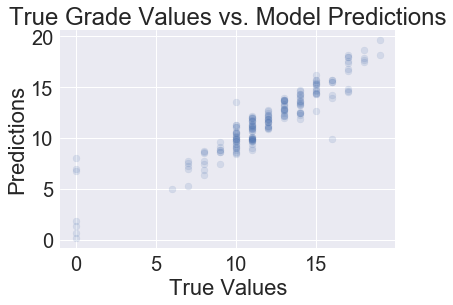

In [100]:
plt.scatter(y_cv, pred_cv, alpha = 0.15)
plt.xlabel('True Values')
plt.title('True Grade Values vs. Model Predictions')
plt.ylabel('Predictions')

In [101]:
df_student.shape

(648, 16)

In [102]:
X.shape

(648, 58)

### Create Correlation Matrix and Heatmap

In [103]:
correlation = X.corr()

In [104]:
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
age,1.000000,-0.110154,-0.123832,0.033608,-0.008555,3.208622e-01,-2.069214e-02,-0.004641,0.111833,0.135776,...,5.281440e-02,-5.281440e-02,0.022253,-0.022253,0.266289,-0.266289,-0.016060,0.016060,-0.180255,0.180255
Medu,-0.110154,1.000000,0.646402,-0.266667,0.096966,-1.716996e-01,2.430608e-02,-0.019365,0.008148,-0.005928,...,-1.215674e-01,1.215674e-01,-0.125139,0.125139,-0.213501,0.213501,-0.270772,0.270772,0.029501,-0.029501
Fedu,-0.123832,0.646402,1.000000,-0.210098,0.050293,-1.653460e-01,2.012022e-02,0.007262,0.026098,0.001356,...,-8.221929e-02,8.221929e-02,-0.073833,0.073833,-0.191284,0.191284,-0.188626,0.188626,0.066010,-0.066010
traveltime,0.033608,-0.266667,-0.210098,1.000000,-0.063245,9.809866e-02,-9.588304e-03,0.001090,0.056872,0.093353,...,3.254357e-02,-3.254357e-02,0.011956,-0.011956,0.072291,-0.072291,0.189742,-0.189742,-0.005434,0.005434
studytime,-0.008555,0.096966,0.050293,-0.063245,1.000000,-1.474090e-01,-4.136541e-03,-0.068809,-0.075560,-0.137547,...,-7.025715e-02,7.025715e-02,-0.042574,0.042574,-0.188230,0.188230,-0.037860,0.037860,-0.033150,0.033150
failures,0.320862,-0.171700,-0.165346,0.098099,-0.147409,1.000000e+00,-6.261025e-02,0.108910,0.045500,0.105671,...,2.129563e-16,-1.998090e-16,0.068975,-0.068975,0.309263,-0.309263,0.096635,-0.096635,-0.069498,0.069498
famrel,-0.020692,0.024306,0.020120,-0.009588,-0.004137,-6.261025e-02,1.000000e+00,0.129238,0.089663,-0.075724,...,-5.774856e-02,5.774856e-02,-0.041008,0.041008,-0.048205,0.048205,-0.082629,0.082629,0.044855,-0.044855
freetime,-0.004641,-0.019365,0.007262,0.001090,-0.068809,1.089097e-01,1.292384e-01,1.000000,0.346672,0.109787,...,-1.501844e-01,1.501844e-01,0.006966,-0.006966,0.102538,-0.102538,-0.062949,0.062949,-0.026922,0.026922
goout,0.111833,0.008148,0.026098,0.056872,-0.075560,4.550035e-02,8.966250e-02,0.346672,1.000000,0.245855,...,-8.971996e-02,8.971996e-02,-0.018159,0.018159,0.069507,-0.069507,-0.095091,0.095091,-0.000298,0.000298
Dalc,0.135776,-0.005928,0.001356,0.093353,-0.137547,1.056706e-01,-7.572389e-02,0.109787,0.245855,1.000000,...,-2.179832e-02,2.179832e-02,0.077993,-0.077993,0.131415,-0.131415,-0.041403,0.041403,-0.061443,0.061443


In [105]:
import seaborn as sns

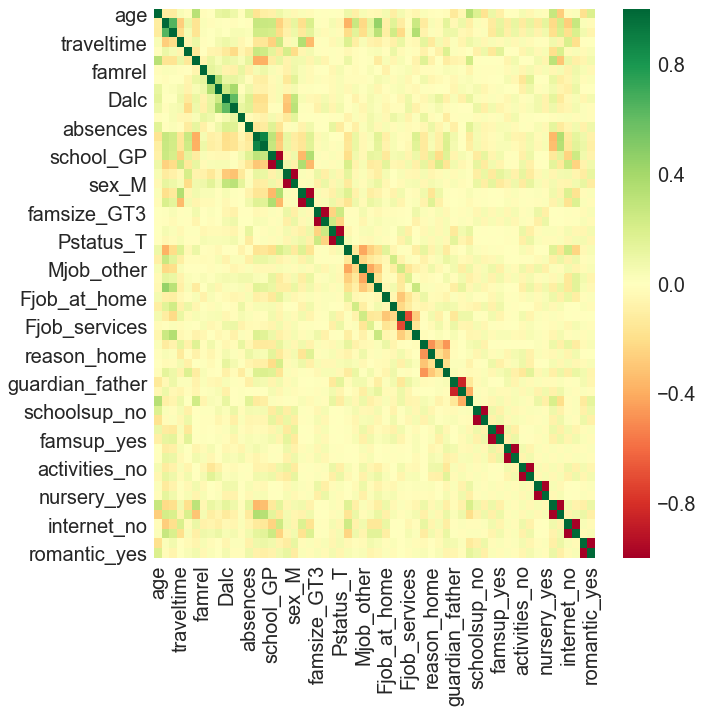

In [106]:
fig,ax = plt.subplots(figsize = (10,10))
sns.heatmap(correlation, cmap = 'RdYlGn')    
plt.tight_layout()
plt.show()

In [107]:
import pandas as pd
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [108]:
df_student.shape

(648, 16)

In [109]:
df_student.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,17,1,1,1,2,0,5,3,3,1,1,3,2,9,11,11
1,15,1,1,1,2,0,4,3,2,2,3,3,6,12,13,12
2,15,4,2,1,3,0,3,2,2,1,1,5,0,14,14,14
3,16,3,3,1,2,0,4,3,2,1,2,5,0,11,13,13
4,16,4,3,1,2,0,5,4,2,1,2,5,6,12,12,13


In [110]:
import numpy as np
import pandas as pd

In [111]:
X_train, X_test, y_train, y_test = train_test_split (df_student,df_student['G3'], test_size = 0.3, random_state=42)

In [112]:
X_train.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
578,18,1,3,1,1,0,4,3,3,2,3,3,0,9,10,9
211,17,4,4,2,1,1,4,2,4,2,3,2,30,14,15,16
9,15,4,4,1,2,0,3,3,3,1,2,2,2,14,14,14
611,17,4,3,2,2,1,4,5,5,1,3,2,4,10,11,11
299,18,4,3,1,2,0,3,1,2,1,3,2,2,15,15,15


### Use Decission Tree Regressor

Import modules

In [113]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

Prediction Targets and Predictors

In [114]:
prediction_target = df_student.G3
predictor_data = X

In [115]:
X

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
1,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
2,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
3,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0
4,16,4,3,1,2,0,5,4,2,1,...,0,1,0,1,0,1,0,1,1,0
5,16,2,2,1,2,0,4,4,4,1,...,1,0,0,1,0,1,0,1,1,0
6,17,4,4,2,2,0,4,1,4,1,...,1,0,0,1,0,1,1,0,1,0
7,15,3,2,1,2,0,4,2,2,1,...,1,0,0,1,0,1,0,1,1,0
8,15,3,4,1,2,0,5,5,1,1,...,0,1,0,1,0,1,0,1,1,0
9,15,4,4,1,2,0,3,3,3,1,...,1,0,0,1,0,1,0,1,1,0


In [116]:
type(predictor_data)

pandas.core.frame.DataFrame

In [117]:
type(prediction_target)

pandas.core.series.Series

In [118]:
prediction_target.shape

(648,)

In [119]:
predictor_data.shape

(648, 58)

#### Decision Tree Regression Model

In [120]:
grade_model = DecisionTreeRegressor()
grade_model.fit(predictor_data, prediction_target)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [121]:
predicted_data=grade_model.predict(predictor_data)

In [122]:
mean_absolute_error (prediction_target, predicted_data)

0.0

In [123]:
print('Original data used as predictor data:')
print(predictor_data.head())
print('Predicted data using predictor_data and prediction target:')
grade_model.predict(predictor_data.head())

Original data used as predictor data:
   age  Medu  Fedu  traveltime  studytime  failures  famrel  freetime  goout  \
0   17     1     1           1          2         0       5         3      3   
1   15     1     1           1          2         0       4         3      2   
2   15     4     2           1          3         0       3         2      2   
3   16     3     3           1          2         0       4         3      2   
4   16     4     3           1          2         0       5         4      2   

   Dalc      ...       activities_no  activities_yes  nursery_no  nursery_yes  \
0     1      ...                   1               0           1            0   
1     2      ...                   1               0           0            1   
2     1      ...                   0               1           0            1   
3     1      ...                   1               0           0            1   
4     1      ...                   0               1           0            

array([ 11.,  12.,  14.,  13.,  13.])

In [124]:
predictor_data_train, predictor_data_val, prediction_target_train, prediction_target_val = train_test_split(predictor_data, prediction_target, random_state = 0)

In [125]:
predictor_data_val

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
531,16,2,1,2,2,0,4,2,2,1,...,1,0,1,0,0,1,0,1,0,1
493,16,1,2,1,2,0,4,4,5,1,...,0,1,0,1,1,0,0,1,1,0
306,17,3,1,1,2,0,5,4,4,3,...,0,1,0,1,0,1,0,1,0,1
624,18,2,3,2,1,0,5,2,3,1,...,1,0,0,1,0,1,0,1,0,1
479,19,2,3,1,1,1,4,4,4,1,...,1,0,0,1,1,0,0,1,0,1
511,18,1,1,1,2,1,4,3,2,1,...,1,0,0,1,0,1,0,1,0,1
303,18,2,2,1,3,0,4,3,3,1,...,0,1,0,1,0,1,0,1,0,1
240,17,2,3,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
533,16,4,4,1,1,0,4,1,2,2,...,1,0,0,1,0,1,0,1,1,0
85,16,2,2,1,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0


In [126]:
prediction_target_val.shape

(162,)

In [127]:
print('Out-of-sample MAE:')
new_model = DecisionTreeRegressor()
new_model.fit(predictor_data_train, prediction_target_train)
new_prediction = new_model.predict(predictor_data_val)
mean_absolute_error(prediction_target_val, new_prediction)

Out-of-sample MAE:


1.2160493827160495

In [128]:
new_prediction_len = new_prediction[:41]

In [129]:
len(new_prediction_len)

41

In [130]:
prediction_target_len = prediction_target[:41]

In [131]:
len(prediction_target_len)

41

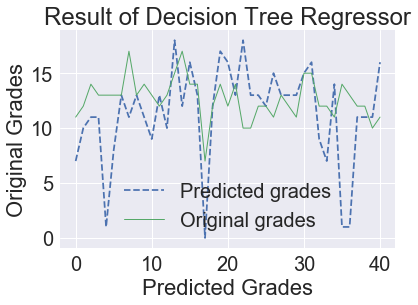

In [132]:
plt.plot(new_prediction_len, '--', label = 'Predicted grades')
plt.plot(prediction_target_len, label = 'Original grades', linewidth = 1)
plt.legend()
plt.ylabel('Original Grades')
plt.xlabel('Predicted Grades')
plt.title('Result of Decision Tree Regressor')
plt.show()

### Find important model features

In [133]:
new_model.feature_importances_

array([  1.62741226e-02,   4.07786064e-03,   1.41763918e-02,
         3.14820070e-03,   1.30654540e-03,   6.36623480e-03,
         1.74209312e-03,   8.26517359e-03,   1.82875541e-02,
         1.41402988e-03,   3.08256263e-03,   1.93389994e-03,
         5.20664215e-02,   2.31872696e-02,   8.22744260e-01,
         1.45926548e-04,   0.00000000e+00,   1.03924409e-03,
         1.98622245e-04,   0.00000000e+00,   0.00000000e+00,
         1.45926548e-04,   1.57438531e-03,   3.56709338e-04,
         5.48035256e-04,   4.11837145e-04,   0.00000000e+00,
         1.09136071e-03,   5.54299780e-04,   1.74903762e-04,
         0.00000000e+00,   5.49964535e-04,   8.35255762e-04,
         6.35359555e-04,   1.45926548e-04,   6.67822772e-04,
         1.45926548e-04,   0.00000000e+00,   0.00000000e+00,
         8.44032908e-04,   1.29712487e-04,   1.11980548e-03,
         5.09584769e-05,   0.00000000e+00,   2.75639034e-04,
         1.29712487e-04,   0.00000000e+00,   0.00000000e+00,
         1.40907910e-03,

In [134]:
important_features = pd.Series(data=new_model.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9]),
 <a list of 10 Text xticklabel objects>)

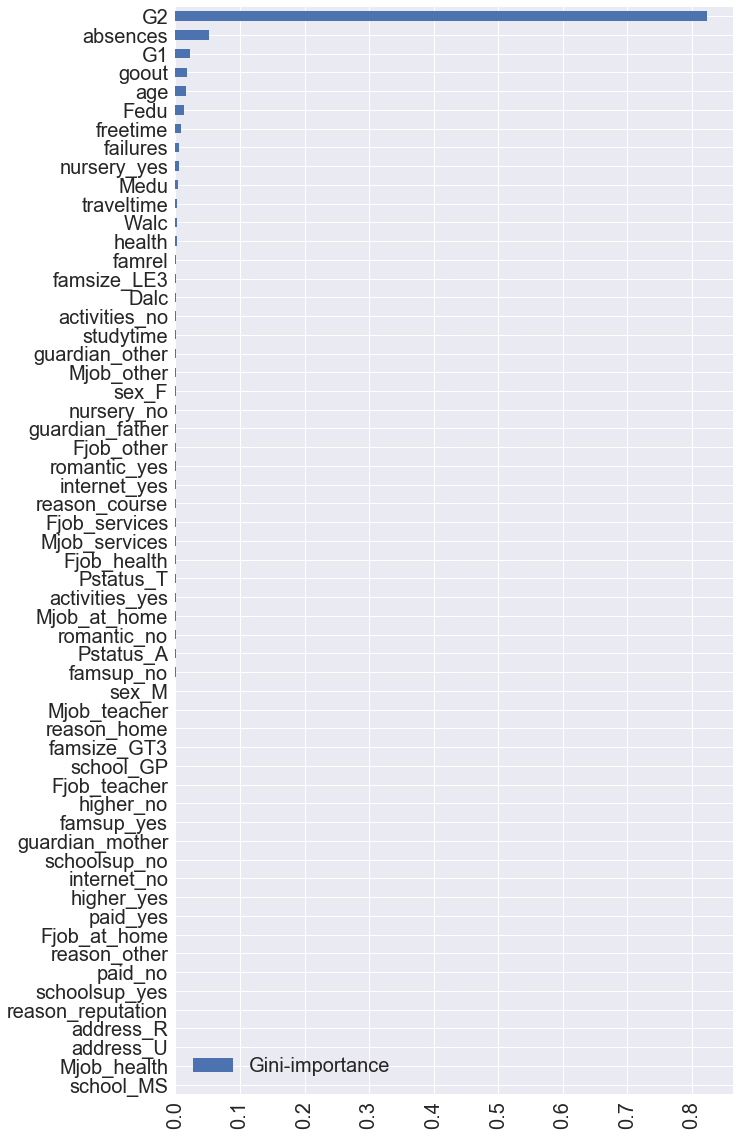

In [135]:
feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(X.columns, new_model.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#log_importances = np.log(importances)

importances.sort_values(by='Gini-importance').plot(kind='barh', figsize = (10,20))
plt.xticks(fontsize=20, rotation=90)

In [136]:
importances

,Gini-importance
age,0.016274
Medu,0.004078
Fedu,0.014176
traveltime,0.003148
studytime,0.001307
failures,0.006366
famrel,0.001742
freetime,0.008265
goout,0.018288
Dalc,0.001414


In [137]:
importances_drop_G2 = importances.drop('G2')

importances_drop_G2

,Gini-importance
age,0.016274
Medu,0.004078
Fedu,0.014176
traveltime,0.003148
studytime,0.001307
failures,0.006366
famrel,0.001742
freetime,0.008265
goout,0.018288
Dalc,0.001414


#### Plot Features Importance without Feature G2

(array([ 0.  ,  0.01,  0.02,  0.03,  0.04,  0.05,  0.06]),
 <a list of 7 Text xticklabel objects>)

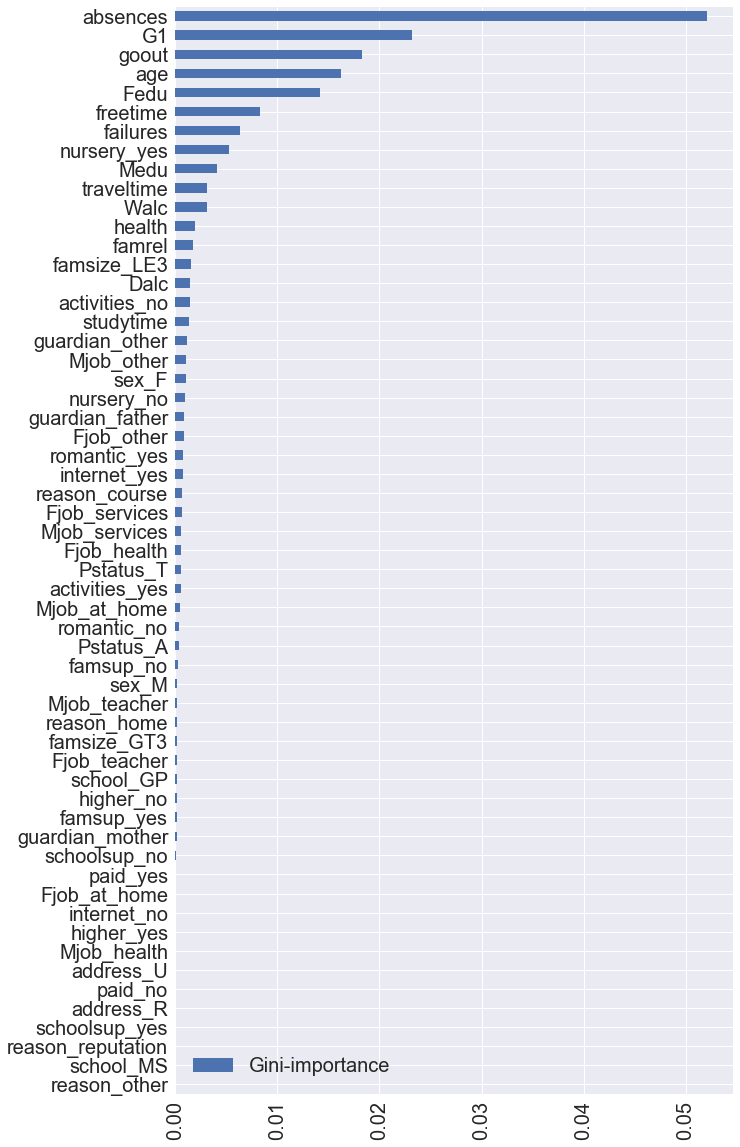

In [138]:
importances_drop_G2.sort_values(by='Gini-importance').plot(kind='barh', figsize = (10,20))
plt.xticks(fontsize=20, rotation=90)